In [7]:
from pathlib import Path
import matplotlib.pyplot as plt 

import os
ret = os.system("cd /export/vlabApps/gemReconnection && git rev-parse HEAD")

import postgkyl as pg

run = Path.cwd()

def getModelType():
    frame = 0 
    models = ["5m", "10m"]
    for model in models:
        path = Path(f"rt-{model}-gem_field_{frame}.bp")
        if path.is_file():
            return model
    error = "Failed to find input ADIOS file rt-5m-gem_field_0.bp or rt-10m-gem_field_0.bp."
    assert False, error

4a7f0927045dcc19c6d7d118f889a66937c36dfe


In [9]:
frame = 0 
model = getModelType()
filename = run / f"rt-{model}-gem_field_{frame}.bp"
filename = str(filename)
print(filename)

/export/vlab_workdirs/PROCESS_8a43d3c7-77a3-4411-b11e-0affe0d9c8b4/rt-5m-gem_field_0.bp


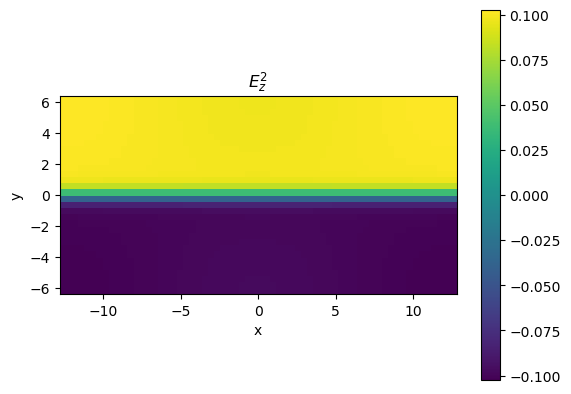

In [10]:
gdata = pg.GData(filename)

vals = gdata.getValues() # cell-center values, shape is Ny * Nx * Ncomponents
grid = gdata.getGrid() # cell corner coordinates
ndim = gdata.getNumDims() # number of spatial dimensions

assert len(vals.shape) == ndim+1 and len(grid) == ndim

icomp = 3 
compName = r'$E_z^2$'
fileName = "E_z.png"

my_vals = vals[..., icomp]
x, y = grid

fig, ax = plt.subplots()

im = ax.pcolormesh(x, y, my_vals.T)
fig.colorbar(im, ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(compName)
ax.set_aspect(1)